In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
file_path = r"C:\\Users\\DELL\\OneDrive\\Desktop\\Hexaware\\Data_Engineering\\Python\\Coding Assessment\\project3 (1) (1).xlsx - InternetCaseStudy.csv"
data = pd.read_csv(file_path)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summarize the dataset - general statistics for numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(data.describe())

# Data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)

# Checking for null values in each column
print("\nNull Values in Each Column:")
print(data.isnull().sum())

# Count of unique values for each column
print("\nUnique Values in Each Column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

# Additional analysis with Pandas and NumPy

# Mean, median, and standard deviation for numerical columns
print("\nMean of Numerical Columns:")
print(data.select_dtypes(include=np.number).mean())

print("\nMedian of Numerical Columns:")
print(data.select_dtypes(include=np.number).median())

print("\nStandard Deviation of Numerical Columns:")
print(data.select_dtypes(include=np.number).std())

# Minimum and maximum values for each numerical column
print("\nMinimum Values in Numerical Columns:")
print(data.select_dtypes(include=np.number).min())

print("\nMaximum Values in Numerical Columns:")
print(data.select_dtypes(include=np.number).max())

# Skewness for each numerical column
print("\nSkewness of Numerical Columns:")
print(data.select_dtypes(include=np.number).skew())


First few rows of the dataset:
   Bounces  Exits  Continent                 Sourcegroup  Timeinpage  \
0        0      0         OC                    (direct)          18   
1        0      0  N.America                    (direct)           4   
2        0      0  N.America                      Others          35   
3        0      0  N.America  public.tableausoftware.com          70   
4        0      0  N.America  public.tableausoftware.com          81   

   Uniquepageviews  Visits  BouncesNew  
0                1       0         0.0  
1                1       0         0.0  
2                1       0         0.0  
3                1       0         0.0  
4                1       0         0.0  

Statistical Summary of Numerical Columns:
            Bounces         Exits    Timeinpage  Uniquepageviews  \
count  32109.000000  32109.000000  32109.000000     32109.000000   
mean       0.713009      0.906039     73.184746         1.114329   
std        0.708215      0.695819    394.44

Correlation Coefficient: 0.8144457070734599

The correlation between unique page views and visits is strong (correlation coefficient = 0.81).


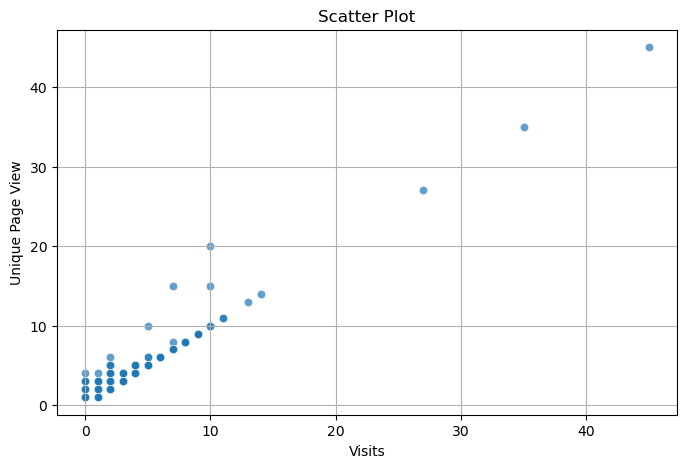

In [26]:
correlation = data['Uniquepageviews'].corr(data['Visits'])
print("Correlation Coefficient:", correlation)

# Interpretation based on correlation coefficient
if abs(correlation) > 0.7:
    dependency = "strong"
elif 0.3 < abs(correlation) <= 0.7:
    dependency = "moderate"
else:
    dependency = "weak"
print(f"\nThe correlation between unique page views and visits is {dependency} (correlation coefficient = {correlation:.2f}).")

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Visits', y='Uniquepageviews', data=data, alpha=0.7)
plt.title("Scatter Plot")
plt.xlabel("Visits")
plt.ylabel("Unique Page View")
plt.grid()
plt.show()

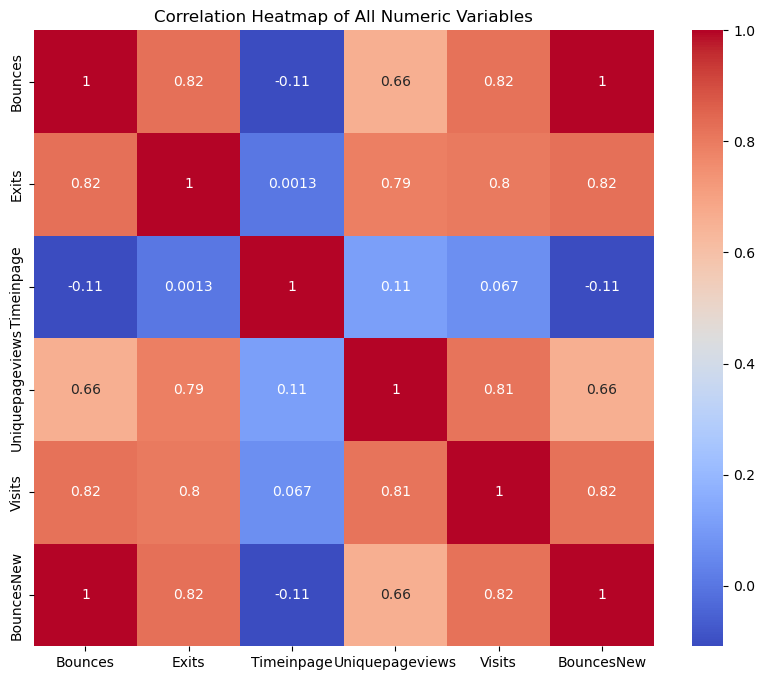

In [8]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of All Numeric Variables")
plt.show()





Correlation of variables with Time on Page:
 Timeinpage         1.000000
Uniquepageviews    0.114593
Visits             0.066650
Exits              0.001325
Bounces           -0.109106
BouncesNew        -0.109106
Name: Timeinpage, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\967410761.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Continent', y='Timeinpage', ci=None, estimator='mean')


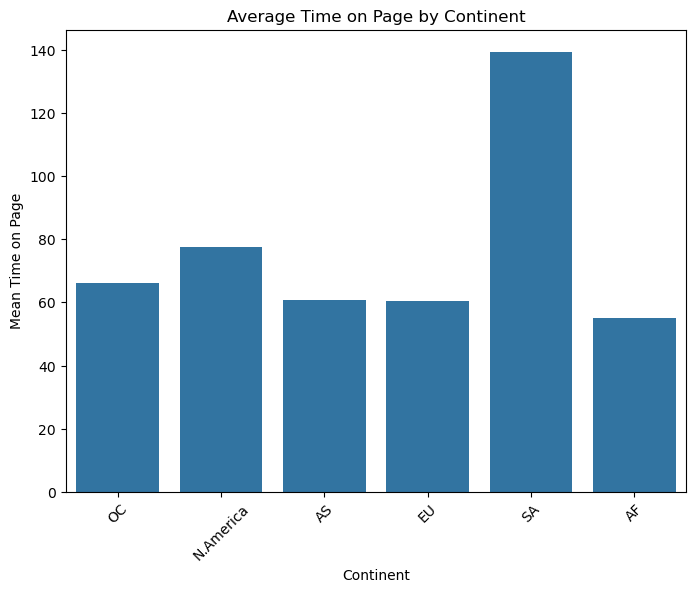

C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\967410761.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Sourcegroup', y='Timeinpage', ci=None, estimator='mean')


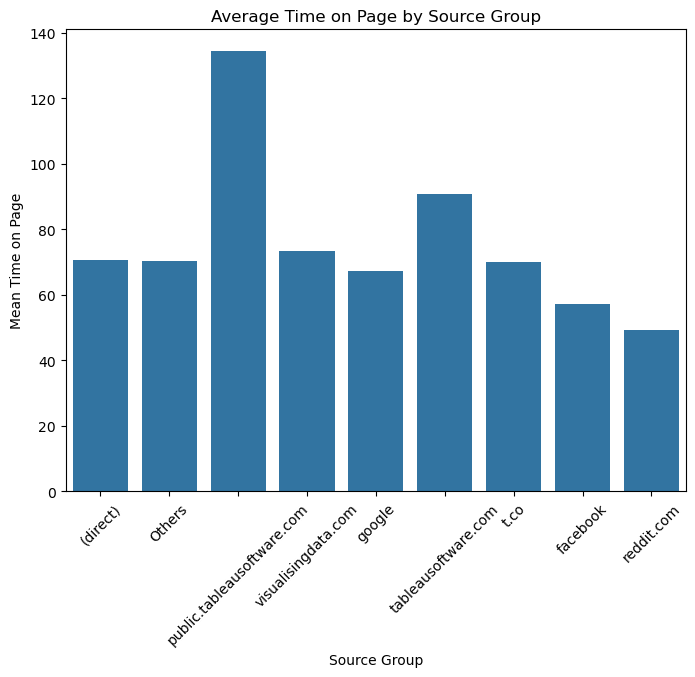

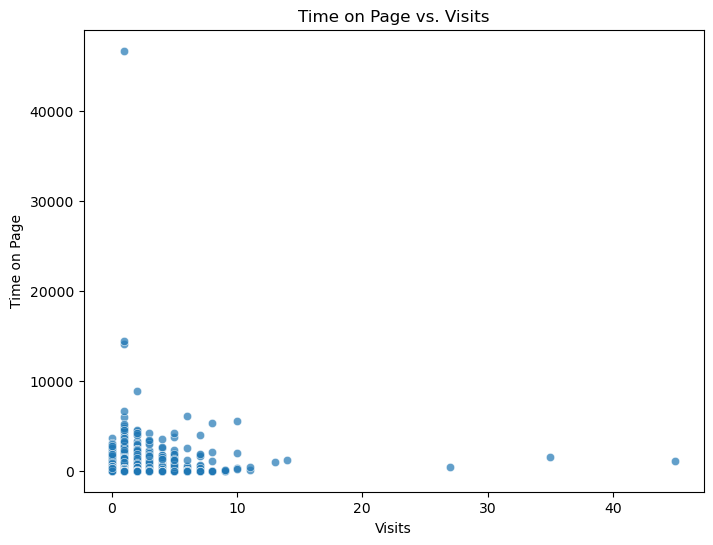

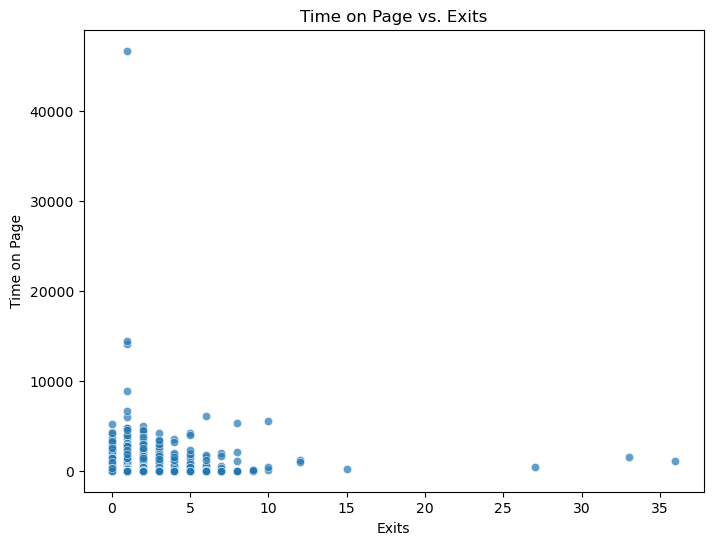

In [35]:
# Convert 'timeinpage' to numeric, coercing errors to NaN
data['Timeinpage'] = pd.to_numeric(data['Timeinpage'], errors='coerce')


# Correlation analysis for Time on Page with numeric columns
time_correlation = data.corr(numeric_only=True)['Timeinpage'].sort_values(ascending=False)
print("Correlation of variables with Time on Page:\n", time_correlation)

# Bar plot for Time on Page by Continent
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Continent', y='Timeinpage', ci=None, estimator='mean')
plt.title("Average Time on Page by Continent")
plt.xticks(rotation=45)
plt.ylabel("Mean Time on Page")
plt.xlabel("Continent")
plt.show()

# Bar plot for Time on Page by Source Group
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sourcegroup', y='Timeinpage', ci=None, estimator='mean')
plt.title("Average Time on Page by Source Group")
plt.xticks(rotation=45)
plt.ylabel("Mean Time on Page")
plt.xlabel("Source Group")
plt.show()

# Scatter plot for Time on Page vs. Visits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Visits', y='Timeinpage',alpha=0.7)
plt.title("Time on Page vs. Visits")
plt.ylabel("Time on Page")
plt.xlabel("Visits")
plt.show()

# Scatter plot for Time on Page vs. Exits
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Exits', y='Timeinpage',alpha=0.7)
plt.title("Time on Page vs. Exits")
plt.ylabel("Time on Page")
plt.xlabel("Exits")
plt.show()





Correlation of variables with Bounces:
 Bounces            1.000000
BouncesNew         1.000000
Exits              0.824912
Visits             0.819343
Uniquepageviews    0.659101
Timeinpage        -0.109106
Name: Bounces, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\4088496050.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Continent', y='Bounces', ci=None, estimator='mean')


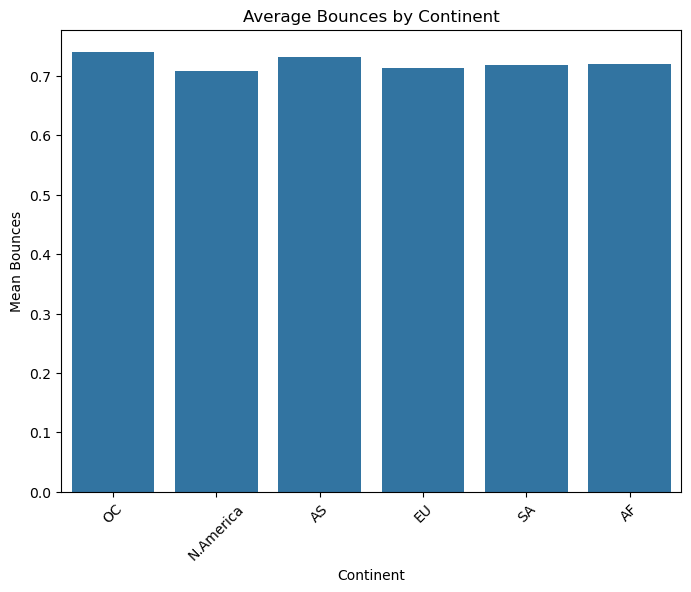

C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\4088496050.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Sourcegroup', y='Bounces', ci=None, estimator='mean')


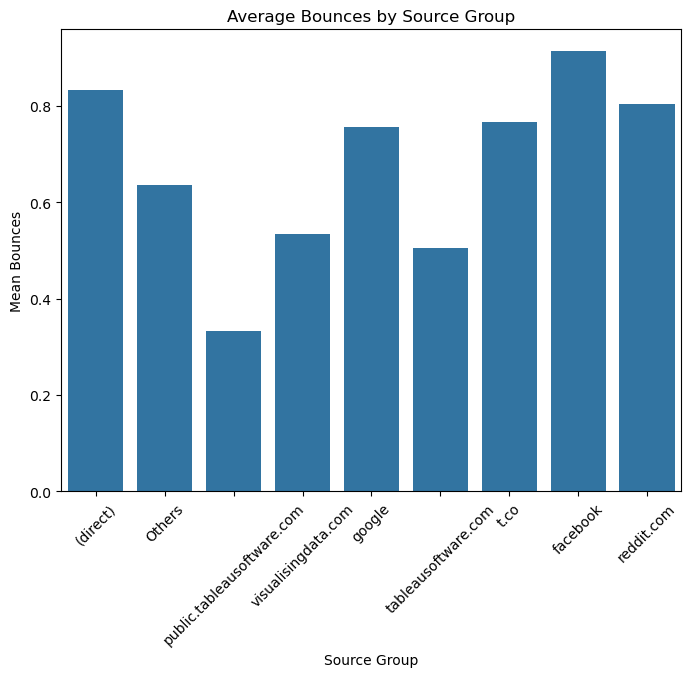

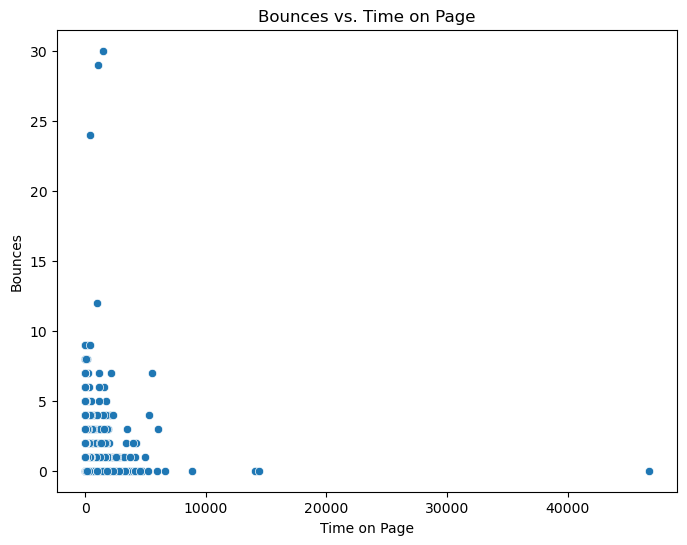

In [34]:
# Correlation with Bounces

data['Bounces'] = pd.to_numeric(data['Bounces'], errors='coerce')

bounce_correlation = data.corr(numeric_only=True)['Bounces'].sort_values(ascending=False)
print("Correlation of variables with Bounces:\n", bounce_correlation)

# Bar plot for Bounces by Continent
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Continent', y='Bounces', ci=None, estimator='mean')
plt.title("Average Bounces by Continent")
plt.xticks(rotation=45)
plt.ylabel("Mean Bounces")
plt.xlabel("Continent")
plt.show()

# Bar plot for Bounces by Source Group
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sourcegroup', y='Bounces', ci=None, estimator='mean')
plt.title("Average Bounces by Source Group")
plt.xticks(rotation=45)
plt.ylabel("Mean Bounces")
plt.xlabel("Source Group")
plt.show()

#Scatter Plot for Bounces vs. Time on Page
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Timeinpage', y='Bounces',alpha=0.7)
plt.title("Bounces vs. Time on Page")
plt.xlabel("Time on Page")
plt.ylabel("Bounces")
plt.show()

